In [1]:
from datetime import datetime

from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

# You can generate a Token from the "Tokens Tab" in the UI
token = "eMcuZw7jmVPBgxBLMYRiJAcxu38AXHnSSZhRpEOxrKE1i_AjZkYuC9w0xMqv-EP8bLA6CyM-zKZj-4dDLEo51Q=="
org = "TTTA"
bucket = "TTTA ENERGY"
client = InfluxDBClient(url="http://119.59.99.194:8086", token=token)

In [2]:
query= '''
from(bucket: "TTTA ENERGY")
  |> range(start: 2023-07-05T17:44:41.769Z, stop: 2023-07-12T17:44:41.769Z)
  |> filter(fn: (r) => r["_measurement"] == "LOAD")
  |> filter(fn: (r) => r["_field"] == "Watts")
  |> yield(name: "mean")
  '''
system_stats = client.query_api().query_data_frame(org=org, query=query)
display(system_stats.head())

/Users/admin/Desktop/machine learning projects/.venv/lib/python3.11/site-packages/influxdb_client/client/warnings.py:31: MissingPivotFunction: The query doesn't contains the pivot() function.

The result will not be shaped to optimal processing by pandas.DataFrame. Use the pivot() function by:

    
from(bucket: "TTTA ENERGY")
  |> range(start: 2023-07-05T17:44:41.769Z, stop: 2023-07-12T17:44:41.769Z)
  |> filter(fn: (r) => r["_measurement"] == "LOAD")
  |> filter(fn: (r) => r["_field"] == "Watts")
  |> yield(name: "mean")
   |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")

You can disable this warning by:
    import warnings
    from influxdb_client.client.warnings import MissingPivotFunction

    warnings.simplefilter("ignore", MissingPivotFunction)

For more info see:
    - https://docs.influxdata.com/resources/videos/pivots-in-flux/
    - https://docs.influxdata.com/flux/latest/stdlib/universe/pivot/
    - https://docs.influxdata.com/flux/latest/stdlib/infl

,result,table,_start,_stop,_time,_value,_field,_measurement
0,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:43.339961+00:00,903.2,Watts,LOAD
1,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:48.550104+00:00,905.8,Watts,LOAD
2,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:53.798419+00:00,911.7,Watts,LOAD
3,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:59.025843+00:00,900.9,Watts,LOAD
4,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:45:04.230494+00:00,1174.8,Watts,LOAD


In [3]:
system_stats.to_csv('data.csv')

In [4]:
# read csv file
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement
0,0,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:43.339961+00:00,903.2,Watts,LOAD
1,1,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:48.550104+00:00,905.8,Watts,LOAD
2,2,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:53.798419+00:00,911.7,Watts,LOAD
3,3,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:44:59.025843+00:00,900.9,Watts,LOAD
4,4,mean,0,2023-07-05 17:44:41.769000+00:00,2023-07-12 17:44:41.769000+00:00,2023-07-05 17:45:04.230494+00:00,1174.8,Watts,LOAD


In [5]:
df.drop(['result', 'table', '_start', '_stop', '_measurement', '_field'], axis=1, inplace=True)
df.head()

,Unnamed: 0,_time,_value
0,0,2023-07-05 17:44:43.339961+00:00,903.2
1,1,2023-07-05 17:44:48.550104+00:00,905.8
2,2,2023-07-05 17:44:53.798419+00:00,911.7
3,3,2023-07-05 17:44:59.025843+00:00,900.9
4,4,2023-07-05 17:45:04.230494+00:00,1174.8


In [6]:
# 2023-07-05 17:44:43.339961+00:00	convert date time
df['time'] = pd.to_datetime(df['_time'])
df['watts'] = df['_value']
# drop column
df.drop(['_time', '_value'], axis=1, inplace=True)
# show data frame
df.head()

,Unnamed: 0,time,watts
0,0,2023-07-05 17:44:43.339961+00:00,903.2
1,1,2023-07-05 17:44:48.550104+00:00,905.8
2,2,2023-07-05 17:44:53.798419+00:00,911.7
3,3,2023-07-05 17:44:59.025843+00:00,900.9
4,4,2023-07-05 17:45:04.230494+00:00,1174.8


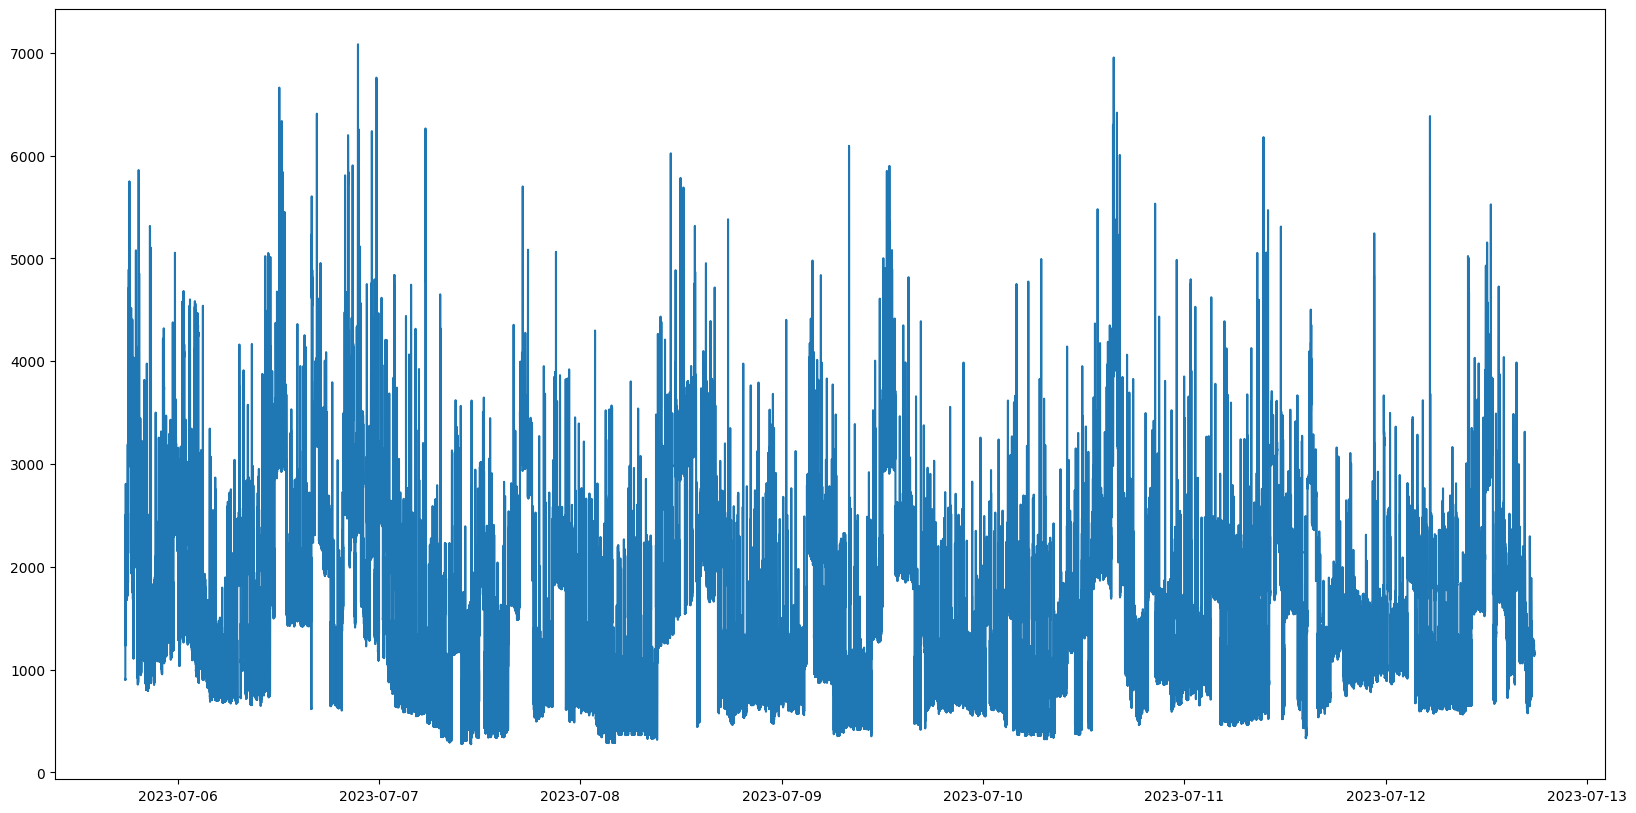

In [7]:
# plot time and watts
plt.figure(figsize=(20,10))
plt.plot(df['time'], df['watts'])

In [8]:
def date_parts(data,date_colume='date'):
    data['year'] = data[date_colume].dt.year
    data['month'] = data[date_colume].dt.month
    data['day'] = data[date_colume].dt.day
    data['hour'] = data[date_colume].dt.hour
    data['minute'] = data[date_colume].dt.minute
    data['second'] = data[date_colume].dt.second
    data['day_name'] = data[date_colume].dt.day_name().astype('category')
    return data

In [9]:
data = date_parts(df,'time')

In [10]:
data

,Unnamed: 0,time,watts,year,month,day,hour,minute,second,day_name
0,0,2023-07-05 17:44:43.339961+00:00,903.2,2023,7,5,17,44,43,Wednesday
1,1,2023-07-05 17:44:48.550104+00:00,905.8,2023,7,5,17,44,48,Wednesday
2,2,2023-07-05 17:44:53.798419+00:00,911.7,2023,7,5,17,44,53,Wednesday
3,3,2023-07-05 17:44:59.025843+00:00,900.9,2023,7,5,17,44,59,Wednesday
4,4,2023-07-05 17:45:04.230494+00:00,1174.8,2023,7,5,17,45,4,Wednesday
...,...,...,...,...,...,...,...,...,...,...
111928,111928,2023-07-12 17:44:19.877189+00:00,1163.3,2023,7,12,17,44,19,Wednesday
111929,111929,2023-07-12 17:44:25.084401+00:00,1153.9,2023,7,12,17,44,25,Wednesday
111930,111930,2023-07-12 17:44:30.287996+00:00,1151.2,2023,7,12,17,44,30,Wednesday
111931,111931,2023-07-12 17:44:35.499774+00:00,1145.2,2023,7,12,17,44,35,Wednesday


In [11]:
# datafrom year month day hour minute second
df = data[['time','year','month','day','day_name','hour','minute','second','watts']]
df = df.set_index('time')

In [12]:
df

,year,month,day,day_name,hour,minute,second,watts
time,,,,,,,,
2023-07-05 17:44:43.339961+00:00,2023,7,5,Wednesday,17,44,43,903.2
2023-07-05 17:44:48.550104+00:00,2023,7,5,Wednesday,17,44,48,905.8
2023-07-05 17:44:53.798419+00:00,2023,7,5,Wednesday,17,44,53,911.7
2023-07-05 17:44:59.025843+00:00,2023,7,5,Wednesday,17,44,59,900.9
2023-07-05 17:45:04.230494+00:00,2023,7,5,Wednesday,17,45,4,1174.8
...,...,...,...,...,...,...,...,...
2023-07-12 17:44:19.877189+00:00,2023,7,12,Wednesday,17,44,19,1163.3
2023-07-12 17:44:25.084401+00:00,2023,7,12,Wednesday,17,44,25,1153.9
2023-07-12 17:44:30.287996+00:00,2023,7,12,Wednesday,17,44,30,1151.2


Text(0.5, 1.0, 'watts vs time')

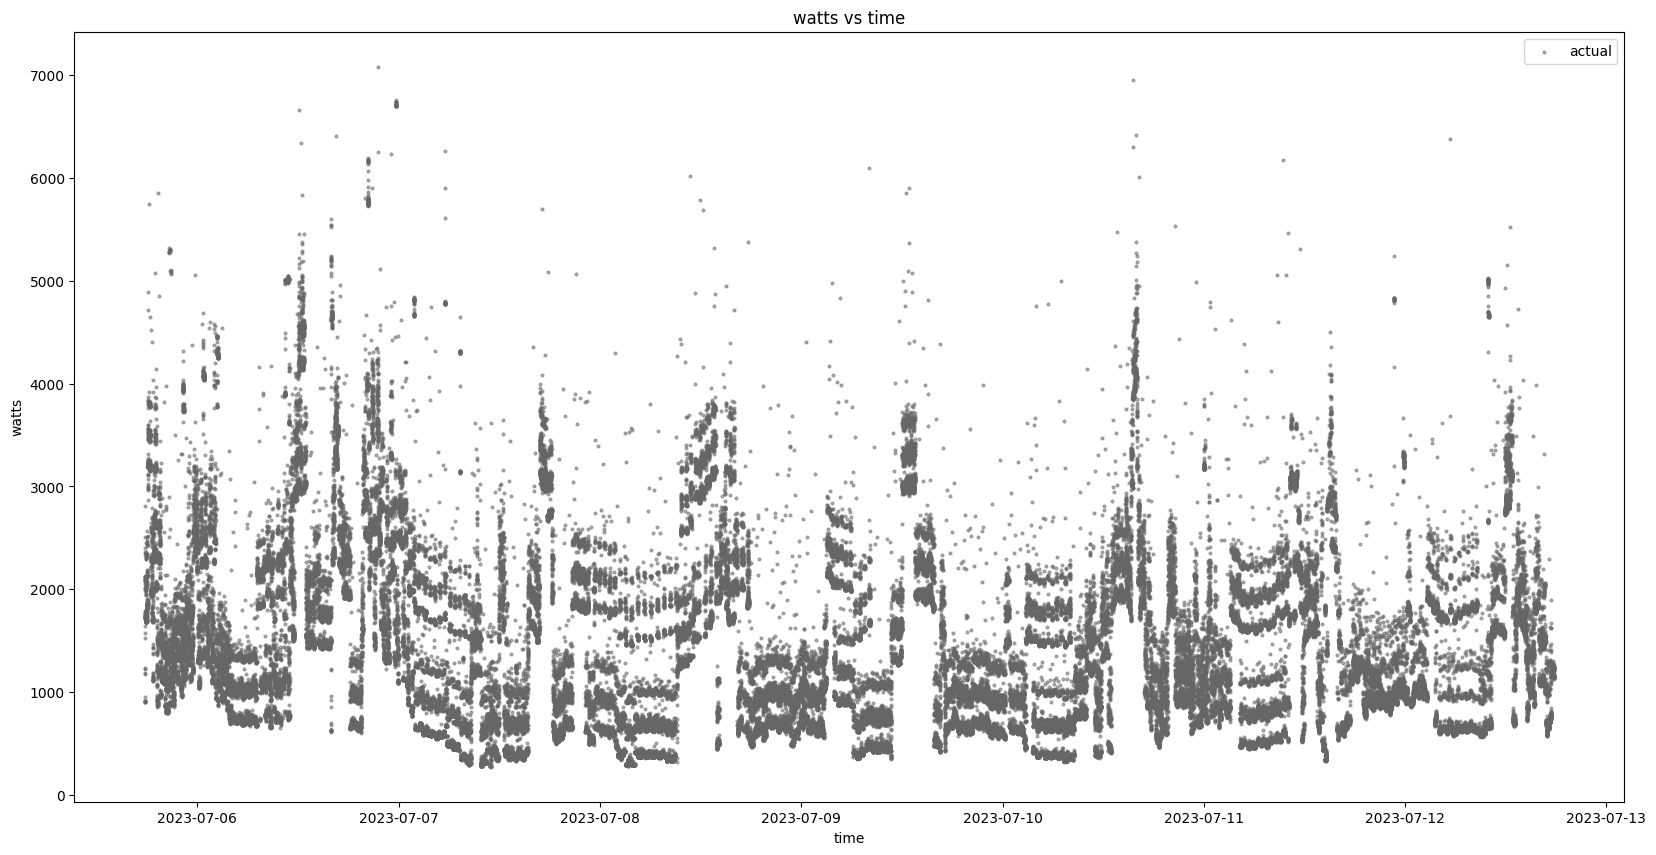

In [13]:
# plot scatter
plt.figure(figsize=(20,10))
plt.scatter(df.index, df['watts'], alpha=0.5, s=4,label='actual',color='0.4')
plt.ylabel('watts')
plt.xlabel('time')
plt.legend()
plt.title('watts vs time')




In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 111933 entries, 2023-07-05 17:44:43.339961+00:00 to 2023-07-12 17:44:40.698789+00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   year      111933 non-null  int32   
 1   month     111933 non-null  int32   
 2   day       111933 non-null  int32   
 3   day_name  111933 non-null  category
 4   hour      111933 non-null  int32   
 5   minute    111933 non-null  int32   
 6   second    111933 non-null  int32   
 7   watts     111933 non-null  float64 
dtypes: category(1), float64(1), int32(6)
memory usage: 4.4 MB


In [15]:
feature_col = ['year','month','day','hour','minute','second']
X = df[feature_col]
y = df['watts']

In [16]:
split = 78353
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

In [17]:
import lightgbm as lgb


In [18]:
reg = lgb.LGBMRegressor()
reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [181]:
# tunning
params = {'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 1.1,
 'max_depth': -1,
 'min_child_samples': 350,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}
reg = lgb.LGBMRegressor(**params)

In [182]:
fit_params={"early_stopping_rounds":200,'eval_set':[(X_test,y_test)],'verbose': 20}
reg.fit(X_train,y_train,**fit_params)

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.


[20]	valid_0's l2: 742845
[40]	valid_0's l2: 744467
[60]	valid_0's l2: 773453
[80]	valid_0's l2: 783309
[100]	valid_0's l2: 799960
[120]	valid_0's l2: 803992
[140]	valid_0's l2: 813104
[160]	valid_0's l2: 820591
[180]	valid_0's l2: 822967
[200]	valid_0's l2: 829444


LGBMRegressor(learning_rate=1.1, min_child_samples=350, n_estimators=200)

In [183]:
reg.score(X_train,y_train)

0.6132874704225038

In [184]:
reg.score(X_test,y_test)

-0.08560147674239471

In [146]:
reg.predict(X_test[:10])

array([1385.68637338, 1385.68637338, 1385.68637338, 1385.68637338,
       1385.68637338, 1385.68637338, 1385.68637338, 1385.68637338,
       1385.68637338, 1385.68637338])

<Figure size 2000x1000 with 0 Axes>

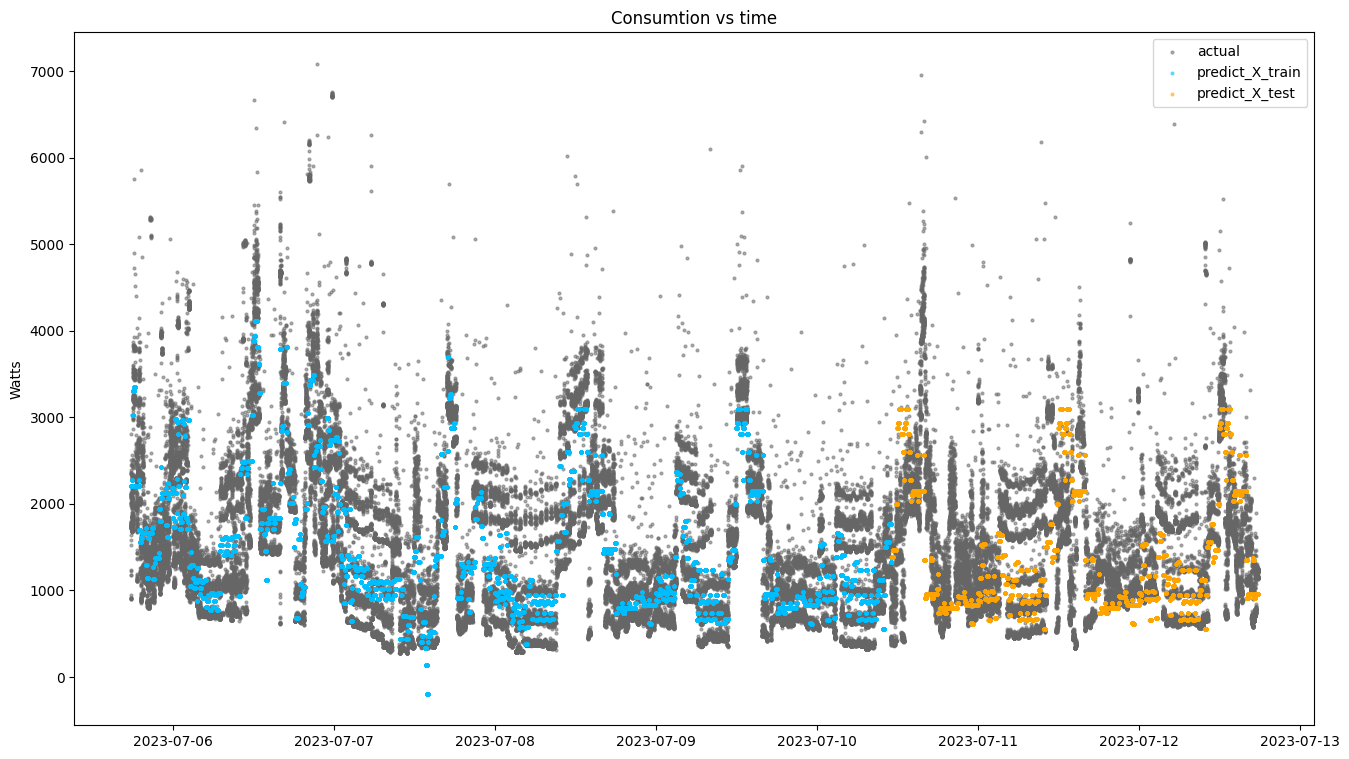

In [147]:
plt.figure(figsize=(20,10))
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df['watts'], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('Watts')
plt.title('consumption vs time')
plt.legend();

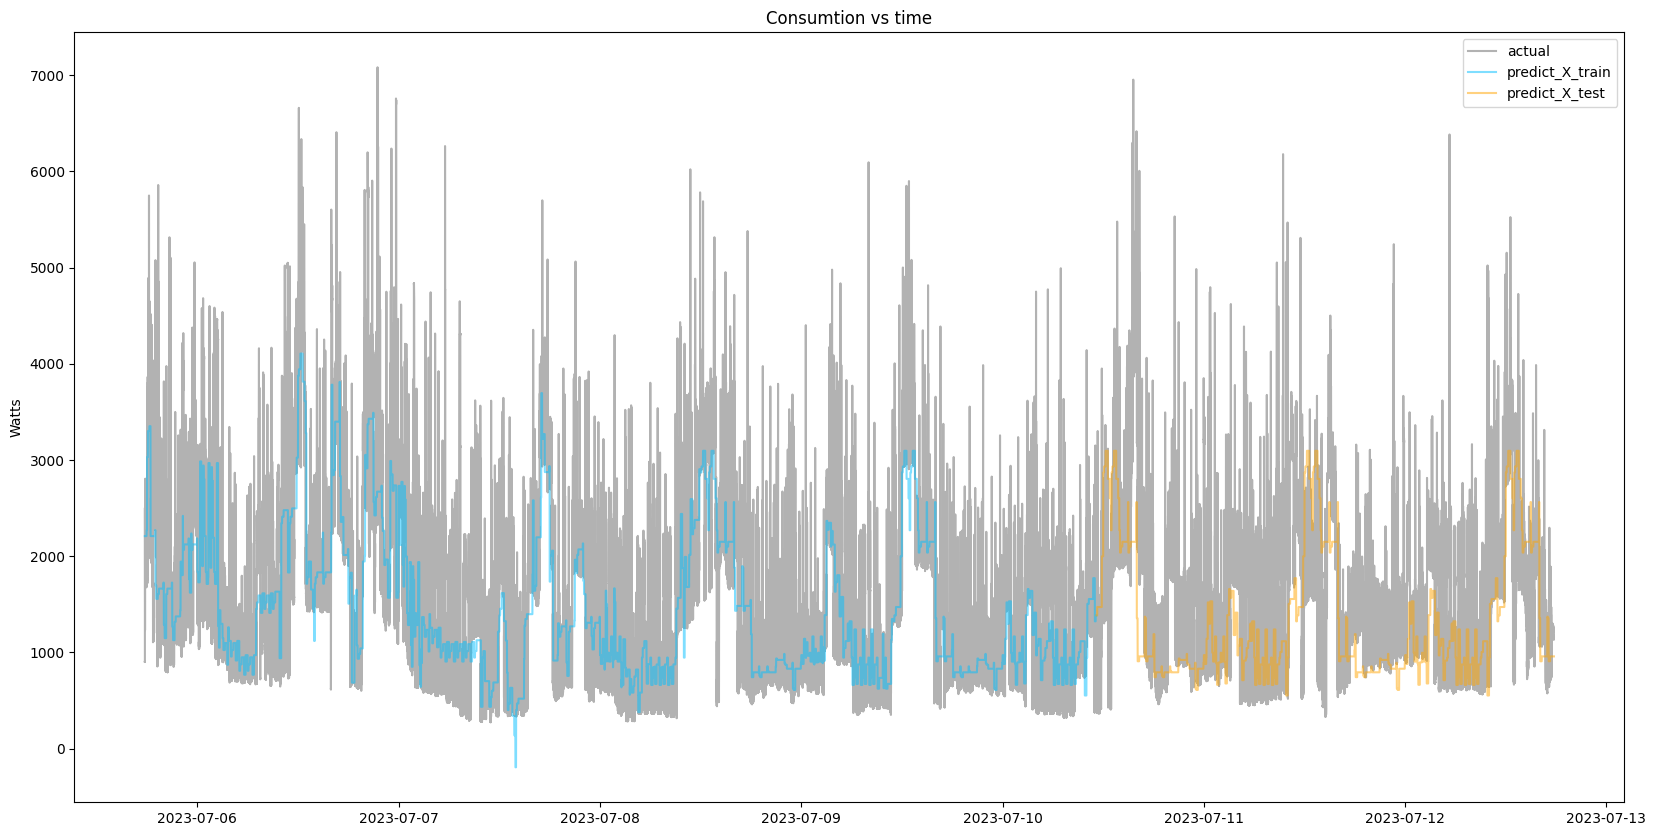

In [148]:
# linear plot
plt.figure(figsize=(20,10))
plt.plot(df.index, df['watts'], alpha=.5, label='actual', color='.4')
plt.plot(X_train.index, reg.predict(X_train), alpha=.5, label='predict_X_train', color='deepskyblue')
plt.plot(X_test.index, reg.predict(X_test), alpha=.5, label='predict_X_test', color='orange')
plt.ylabel('Watts')
plt.title('Consumtion vs time')
plt.legend();

In [149]:
X_train

,year,month,day,hour,minute,second
time,,,,,,
2023-07-05 17:44:43.339961+00:00,2023,7,5,17,44,43
2023-07-05 17:44:48.550104+00:00,2023,7,5,17,44,48
2023-07-05 17:44:53.798419+00:00,2023,7,5,17,44,53
2023-07-05 17:44:59.025843+00:00,2023,7,5,17,44,59
2023-07-05 17:45:04.230494+00:00,2023,7,5,17,45,4
...,...,...,...,...,...,...
2023-07-10 11:10:59.982342+00:00,2023,7,10,11,10,59
2023-07-10 11:11:05.179921+00:00,2023,7,10,11,11,5
2023-07-10 11:11:10.384844+00:00,2023,7,10,11,11,10


# SHAP

In [150]:
import shap 
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [151]:
explain = shap.TreeExplainer(reg)
shap_values = explain.shap_values(X_train)

In [152]:
explain.__dict__

{'model': <shap.explainers._tree.TreeEnsemble at 0x13e708110>,
 'output_names': None,
 'feature_names': None,
 'masker': None,
 'link': CPUDispatcher(<function identity at 0x13b37bf60>),
 'linearize_link': True,
 'data': None,
 'data_missing': None,
 'feature_perturbation': 'tree_path_dependent',
 'expected_value': 1452.5737271310775,
 'model_output': 'raw',
 'approximate': False}

In [153]:
shap_values.shape

(78353, 6)

In [154]:
shap_values[:6]

array([[  0.        ,   0.        , 383.01990557, 456.18783196,
        -81.75463638,   0.        ],
       [  0.        ,   0.        , 383.01990557, 456.18783196,
        -81.75463638,   0.        ],
       [  0.        ,   0.        , 383.01990557, 456.18783196,
        -81.75463638,   0.        ],
       [  0.        ,   0.        , 383.01990557, 456.18783196,
        -81.75463638,   0.        ],
       [  0.        ,   0.        , 380.81013566, 444.06372037,
        -67.42075488,   0.        ],
       [  0.        ,   0.        , 380.81013566, 444.06372037,
        -67.42075488,   0.        ]])

In [155]:
feature_col

['year', 'month', 'day', 'hour', 'minute', 'second']

In [156]:
dshap = pd.DataFrame(shap_values, columns=feature_col)
dshap.head()

,year,month,day,hour,minute,second
0,0.0,0.0,383.019906,456.187832,-81.754636,0.0
1,0.0,0.0,383.019906,456.187832,-81.754636,0.0
2,0.0,0.0,383.019906,456.187832,-81.754636,0.0
3,0.0,0.0,383.019906,456.187832,-81.754636,0.0
4,0.0,0.0,380.810136,444.063720,-67.420755,0.0


In [157]:
np.abs(dshap).mean().sort_values(ascending=False)

hour      372.681067
day       316.859104
minute     79.187351
year        0.000000
month       0.000000
second      0.000000
dtype: float64

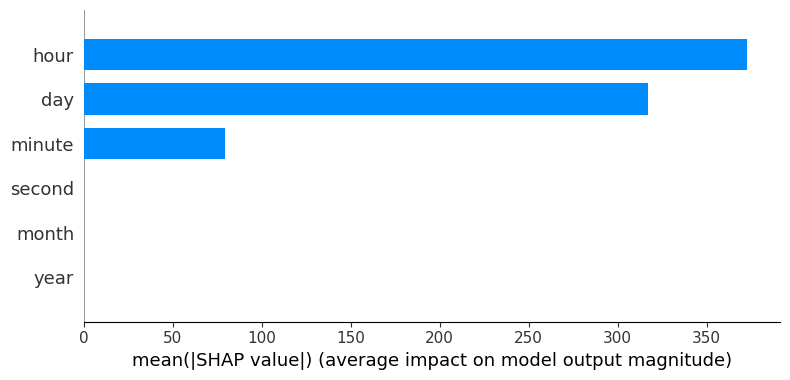

In [158]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


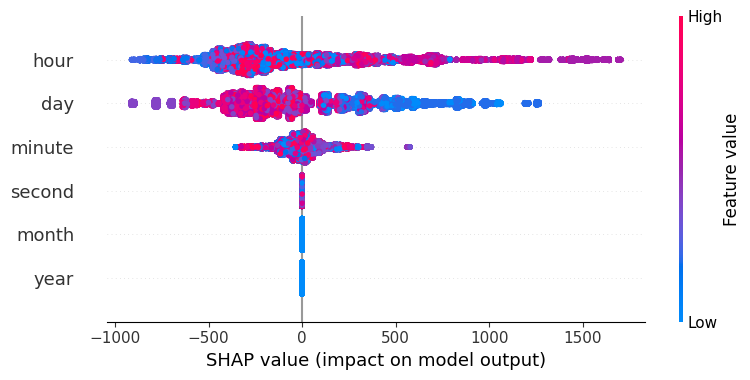

In [160]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

In [173]:
shap_values

array([[ 0.00000000e+00,  0.00000000e+00,  1.49105734e+02,
         2.20479216e+02, -1.59986117e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.49105734e+02,
         2.20479216e+02, -1.59986117e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.49105734e+02,
         2.20479216e+02, -1.59986117e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -7.75863299e+01,
         8.02263589e+01, -2.07207829e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.75863299e+01,
         8.02263589e+01, -2.07207829e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.75863299e+01,
         8.02263589e+01, -2.07207829e-01,  0.00000000e+00]])

In [249]:
X

,year,month,day,hour,minute,second
time,,,,,,
2023-07-05 17:44:43.339961+00:00,2023,7,5,17,44,43
2023-07-05 17:44:48.550104+00:00,2023,7,5,17,44,48
2023-07-05 17:44:53.798419+00:00,2023,7,5,17,44,53
2023-07-05 17:44:59.025843+00:00,2023,7,5,17,44,59
2023-07-05 17:45:04.230494+00:00,2023,7,5,17,45,4
...,...,...,...,...,...,...
2023-07-12 17:44:19.877189+00:00,2023,7,12,17,44,19
2023-07-12 17:44:25.084401+00:00,2023,7,12,17,44,25
2023-07-12 17:44:30.287996+00:00,2023,7,12,17,44,30


In [179]:
X

,year,month,day,hour,minute,second
time,,,,,,
2023-07-05,2023,7,5,17,44,43
2023-07-05,2023,7,5,17,44,48
2023-07-05,2023,7,5,17,44,53
2023-07-05,2023,7,5,17,44,59
2023-07-05,2023,7,5,17,45,4
...,...,...,...,...,...,...
2023-07-12,2023,7,12,17,44,19
2023-07-12,2023,7,12,17,44,25
2023-07-12,2023,7,12,17,44,30
